In [1]:
import cv2
import os
import matplotlib.pyplot as plt



In [81]:
def display_img(image, gray=False):
    if gray:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(image)
    plt.axis('off')

def resize_images(image, new_size=(227, 227), preserve_ratio = False):
    '''Resizing function to handle image sizes from different datasets. It can resize to a fixed 
    ratio, or preserve the ratio as HAM10000 dataset aspect ratio.
    '''
    height, width       = image.shape[:2]

    # print(f"i/p image shape (h, w, c): {image.shape}")

    # Option to preserve the ratio of all images, so resizing all images' longer 
    # side to 600 pixels while preserving the aspect ratio.
    if(preserve_ratio):
        # if HAM10000, don't resize
        if (height, width) == (450, 600):
            return image        
        
        # HAM10000 aspect ratio is 600 / 450 = 1.33333333 
        image_aspect_ratio = float(600) / 450

        # print(f"Resizing as HAM10000 ratio with the longest side = 600 : {image_aspect_ratio}")

        if width > height:
            new_width = 600
            new_height = int(new_width / image_aspect_ratio)
        else:
            new_height = 600
            new_width = int(new_height * image_aspect_ratio)

        resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

    else:
        # For consistency, all the images are resized to 227×227×3.
        resized_image = cv2.resize(image, new_size, interpolation=cv2.INTER_CUBIC)

    return resized_image

i/p image shape (h, w, c): (450, 600, 3)
i/p image resized shape: (450, 600, 3)


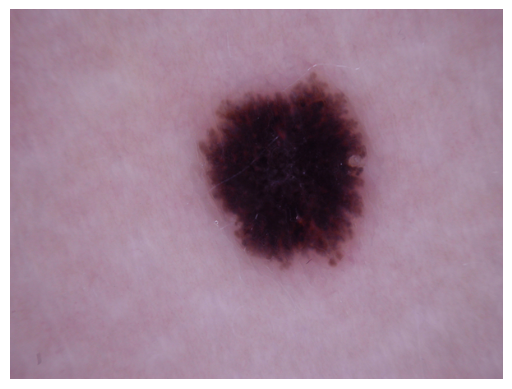

In [82]:
img_name = 'nev00001.jpg' # HAM10000 image

img_dir  = os.path.join(os.getcwd(), '../challenge1/train/nevus', img_name)
image = cv2.imread(img_dir,cv2.IMREAD_COLOR)

# Resizing HAM10000 with preserving its dimensions, should be the same as its the 
# reference while preserving
resized_image = resize_images(image, preserve_ratio=True)

print(f"i/p image resized shape: {resized_image.shape}")
display_img(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

i/p image shape (h, w, c): (1024, 1024, 3)
i/p image resized shape: (600, 800, 3)


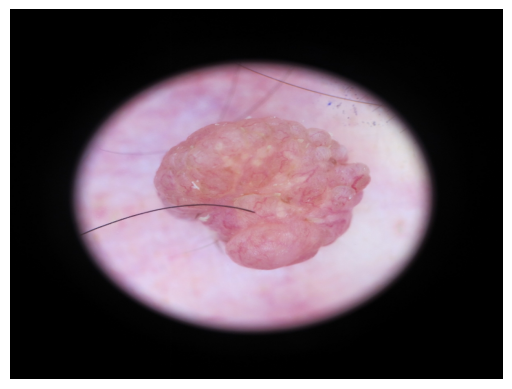

In [83]:
img_name = 'nev00031.jpg' # BCN_20000 image

img_dir  = os.path.join(os.getcwd(), '../challenge1/train/nevus', img_name)
image = cv2.imread(img_dir,cv2.IMREAD_COLOR)

# resizing to fit the aspect ration of a HAM10000 image
resized_image = resize_images(image, preserve_ratio=True)

print(f"i/p image resized shape: {resized_image.shape}")
display_img(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

i/p image shape (h, w, c): (1024, 1024, 3)
i/p image resized shape: (227, 227, 3)


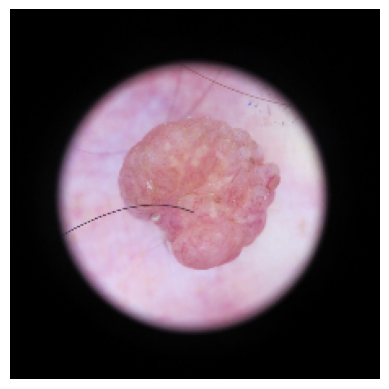

In [86]:
img_name = 'nev00031.jpg' # BCN_20000 image

img_dir  = os.path.join(os.getcwd(), '../challenge1/train/nevus', img_name)
image = cv2.imread(img_dir,cv2.IMREAD_COLOR)

# resizing to to (227x277x3) without preserving the ratio
resized_image = resize_images(image, preserve_ratio=False)

print(f"i/p image resized shape: {resized_image.shape}")
display_img(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

i/p image shape (h, w, c): (680, 1024, 3)
i/p image resized shape: (450, 600, 3)


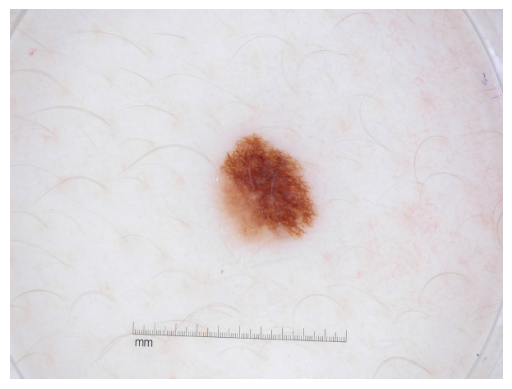

In [85]:
img_name = 'nev00384.jpg' # Other random sized image - MSK Dataset

img_dir  = os.path.join(os.getcwd(), '../challenge1/train/nevus', img_name)
image = cv2.imread(img_dir,cv2.IMREAD_COLOR)

# resizing to to (227x277x3) without preserving the ratio
resized_image = resize_images(image, preserve_ratio=True)

print(f"i/p image resized shape: {resized_image.shape}")
display_img(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))